In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt
import numpy as np

In [2]:
stk_data = pd.read_csv("Tatacoffee13_21.csv")
stk_data['Date'] = pd.to_datetime(stk_data['Date'])
start_date = dt.datetime(2021, 9, 1)
end_date = dt.datetime(2022, 2, 4)
filtered_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]
print(filtered_data)



           Date    Open    High     Low   Close
2144 2021-09-01  214.00  214.25  207.90  211.10
2145 2021-09-02  211.90  213.75  208.70  209.50
2146 2021-09-03  210.00  211.25  206.40  207.60
2147 2021-09-06  207.60  209.50  203.20  204.10
2148 2021-09-07  211.35  217.00  209.60  212.45
...         ...     ...     ...     ...     ...
2220 2021-12-22  202.90  207.80  201.35  205.00
2221 2021-12-23  206.00  206.85  202.05  202.95
2222 2021-12-24  203.90  203.90  199.35  201.00
2223 2021-12-27  200.00  222.00  196.00  218.35
2224 2021-12-28  219.65  220.45  211.55  212.35

[81 rows x 5 columns]


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (2225, 1)


In [5]:
orders = [(1, 0, 2), (1, 0, 1), (2, 0, 1), (1, 0, 1)]
orderslist = []
rscorelist = []

for i in orders:
    orderslist.append(i) 
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(0, len(data1)-1)
    mse = np.mean((data1 - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((data1 - y_pred) / data1)) * 100
    rscorelist.append((rmse, mape))


C:\Users\sony\Anaconda3\envs\AIMLL\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


In [6]:
len(data1)

2225

In [8]:
import pandas as pd
import numpy as np

# Assuming y_test is your test data
y_test = [0.1, 0.2, 0.3, 0.4, 0.5]  # Replace this with your actual test data

aTestNormTable = pd.DataFrame({'Close': np.array(y_test).flatten()})
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori.flatten()})


In [9]:
predicted_stock_price_test_oriP = pd.DataFrame({'Close': y_pred})
predicted_stock_price_test_oriP[['Close']] = Ms.inverse_transform(predicted_stock_price_test_oriP[['Close']])



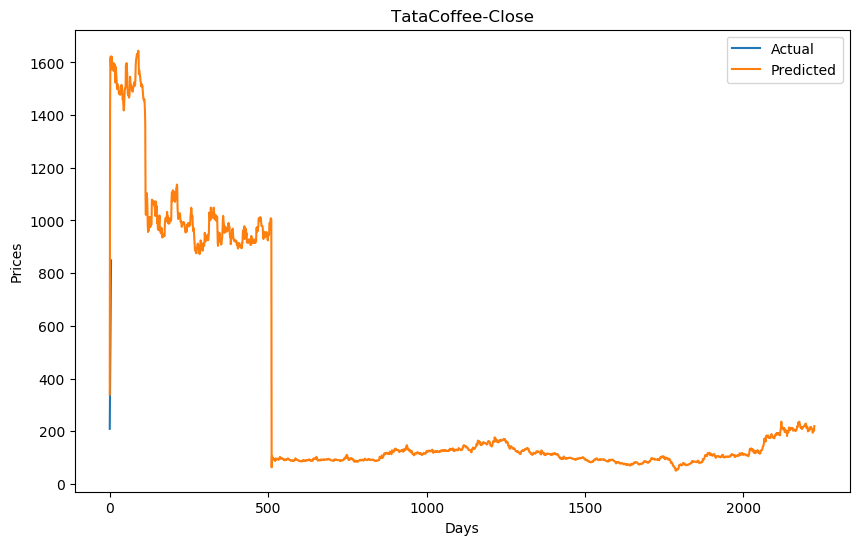

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA['Close'], label='Actual')
plt.plot(predicted_stock_price_test_oriP['Close'], label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee-Close')
plt.legend()
plt.show()


In [12]:
def rmsemape(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

rmse, mape = rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)


In [13]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.10199764, 0.10227282, 0.10254704, 0.10282032])

In [14]:
fTestNormTable = pd.DataFrame({'Closefore': forecast})
Ms.fit(fTestNormTable[['Closefore']].values.reshape(-1, 1))  
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable[['Closefore']])
forecast_stock_price_test_oriF = pd.DataFrame({'Closefore': forecast_stock_price_test_ori[:, 0]})

In [15]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [16]:
forecast_stock_price_test_oriF

,Closefore
0,0.102082
1,0.102082
2,0.102082
3,0.102082


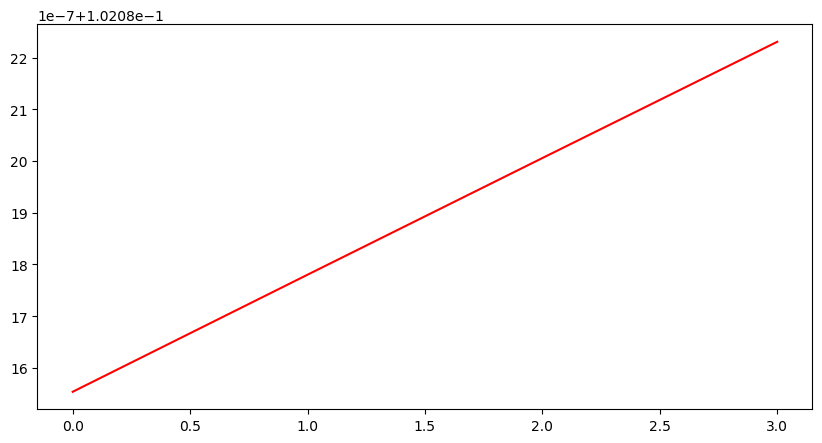

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2000:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")